# **Weather in Szeged 2006-2016**
*dataset obtained from Kaggle:* https://www.kaggle.com/budincsevity/szeged-weather
## **Objective:**
### Answer the questions "Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? " through data visualization.

# ------------------------------------------------------------------------------------

### Importing the relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Importing the dataset and separating the feature matrix from the class vector

In [3]:
weather_data = pd.read_csv('weatherHistory.csv')
X = weather_data.iloc[:, :-1].values
y = weather_data.iloc[:, -1].values
# doing a quick visualization of the dataset's 'header'
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Finding out more about the dataset, e.g. number of rows, column names, general information et cetera

In [4]:
# Quick overview of the data
weather_data.describe() 

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
# General information about the dataset's feature counts and types
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### More data exploration
My first thoughts about the dataset upon looking at its description (.describe() method) are that it seems to follow a central tendency of distribution and that it does not seem to be too dispersed. I shall now explore those hypotheses and find out whether they are valid or not. It also seems that there are some null values on 'Precip Type' which I might have to deal with later on.

<AxesSubplot:>

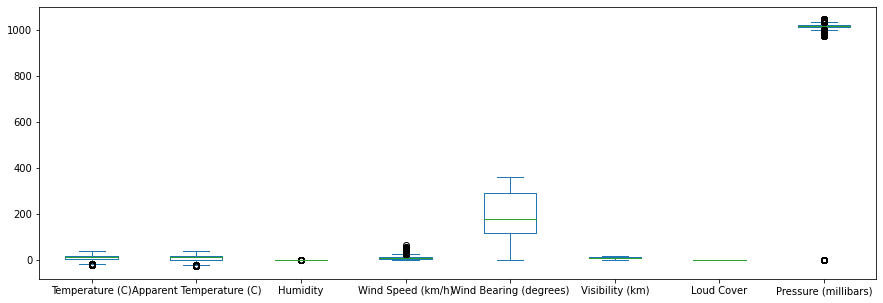

In [6]:
weather_data.plot(kind='box', figsize=(15,5))

As expected, the figure above does not do a good job at representing information. This is due to the fact that all of the features and their representations are bundled together, being forced into the same scale. Below, I'll be separating a few of these into subplots, particularly, 'Humidity', 'Temperature (C)' and 'Pressure (millibars)'.

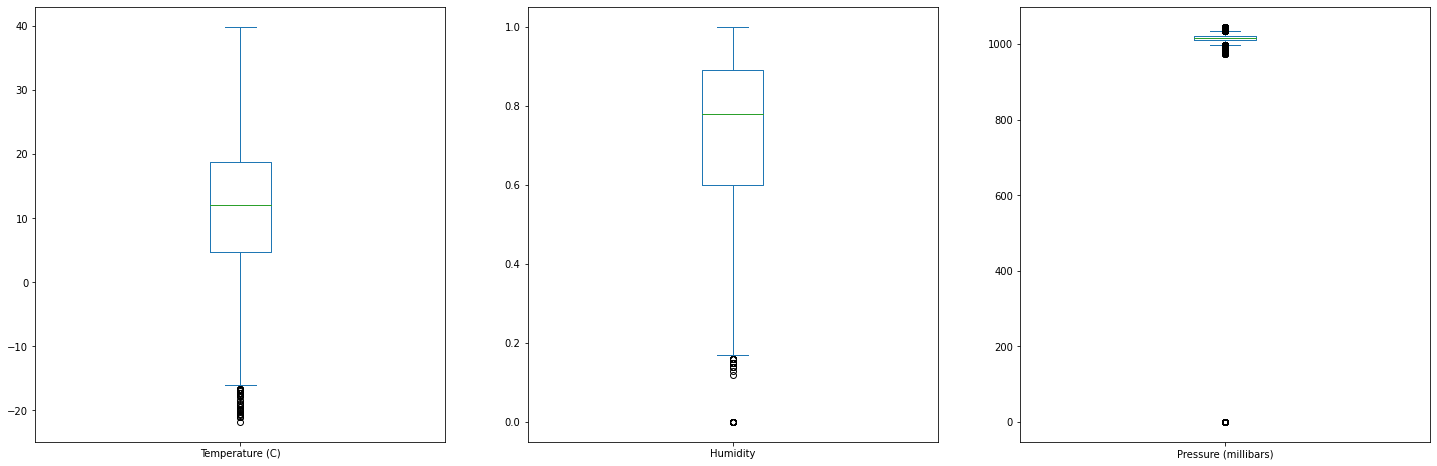

In [7]:
# creating three subplots in the same figure (one row, three columns)
# the axes variable will hold a list with the three subplots for referencing 
fig, axes = plt.subplots(1,3, figsize = (25,8))

# plotting a specific series in each element of the axes list
weather_data["Temperature (C)"].plot(kind = "box", ax = axes[0])
weather_data["Humidity"].plot(kind = "box", ax = axes[1])
weather_data["Pressure (millibars)"].plot(kind = "box", ax = axes[2])
plt.show()

There seem to be a small quantity of outliers, and the Pressure seems to be heavily affected by a few null values that make its visualization hard. Thus, I shall now deal with said values by replacing them with the mean.

In [8]:
index = weather_data.columns.get_loc('Pressure (millibars)')
weather_data['Pressure (millibars)'] = weather_data['Pressure (millibars)'].replace(0, sum(weather_data['Pressure (millibars)'])/len(weather_data['Pressure (millibars)']))
X[:, index] = weather_data['Pressure (millibars)']

Plotting the boxplot again for the Pressure feature:

<AxesSubplot:>

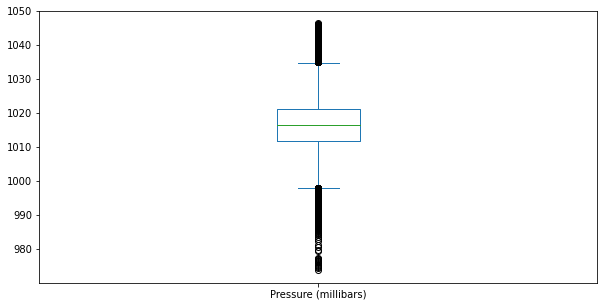

In [9]:
weather_data["Pressure (millibars)"].plot(kind = "box", figsize=(10, 5))

Much better. This shows that there are many more outliers than what was really expected, but this is fine given how the visualization improved tenfold.
# ------------------------------------------------------------------------------------

# Question: Is there a relationship between humidity and temperature?
### The next few cells are an attempt at answering the question above.

First, let us explore their correlation on a plot. 

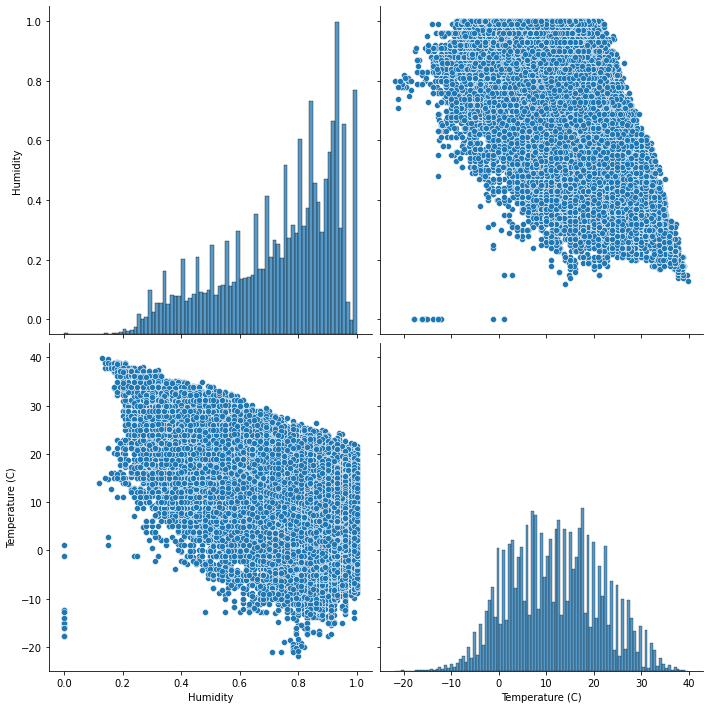

In [10]:
sns.pairplot(data=weather_data[['Humidity', 'Temperature (C)']], height=5, aspect=1)


Moreover, we can also create a heatmap to further make it understandable.

<AxesSubplot:>

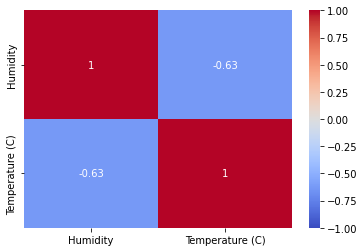

In [14]:
humidity_temp = weather_data[['Humidity', 'Temperature (C)']]
humidity_temp_correlation = humidity_temp.corr(method='pearson')

sns.heatmap(humidity_temp_correlation, vmax=1, vmin=-1, cmap='coolwarm', annot=True,
                xticklabels=humidity_temp.columns.values, yticklabels=humidity_temp.columns.values)


### Using the data aforedescribed, we can conclude that the Humidity and Temperature attributes are negatively correlated, with ρ=-0.63.

# ------------------------------------------------------------

# Question: What about between humidity and apparent temperature?
### Which is what I'll answer now, using much of the same processes that have already been shown here.

First, let us look at their pair graphs and see if we can spot an obvious correlation or a glimpse of one.

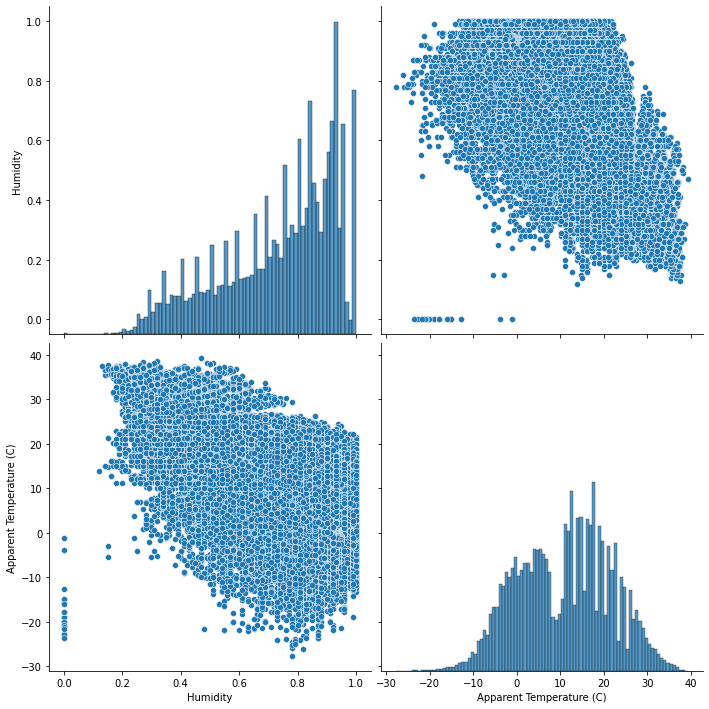

In [15]:
sns.pairplot(data=weather_data[['Humidity', 'Apparent Temperature (C)']], height=5, aspect=1)

As we can see, the graphs don't change much from that with the normal Temperature being put into question. Now let's check their heatmap correlation to make sure we don't miss anything.

<AxesSubplot:>

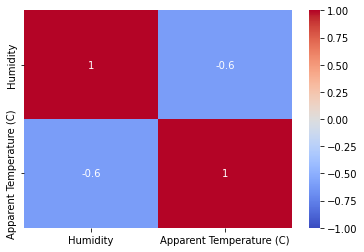

In [16]:
humidity_apptemp = weather_data[['Humidity', 'Apparent Temperature (C)']]
humidity_apptemp_correlation = humidity_apptemp.corr(method='pearson')

sns.heatmap(humidity_apptemp_correlation, vmax=1, vmin=-1, annot=True, cmap='coolwarm',
                xticklabels=humidity_apptemp.columns.values, yticklabels=humidity_apptemp.columns.values)

### Conclusion: they're negatively correlated by a factor of ρ=-0.6, which is a slightly weaker correlation than the one shown previously, between Humidity and Temperature.